# Notebook 14 - Solving Nonlinear Equations and Finding Roots

Consider the equation:

$x = 2 - e^{-x}$

There is one value of $x$ for which this is true. We can't rely on analytical methods to find this value, but we can use numerical methods. We can also think about this equation in another way. First, lets rewrite the equation as follows:

$x + e^{-x} - 2 = 0$

Therefore solving this equation is equivalent to finding the root of the equation above.

We will consider the following methods: The relaxation method, the bisection method, and the Newton-Raphson method.

## Relaxation method

The relaxation method is an iterative method for solving equations. 

$x = 2 - e^{-x}$

The method works as follows: Guess a value for x. See what the right hand side of the equation is equal to. Then use this value as a new guess. Keep doing this and you may converge on the right answer!

As an example, lets start by guessing x = 0:

| x | 2 - e^{-x}| 
| ------ | ---------- |
| 0 | 1| 
| 1 | 1.632| 
| 1.632 | 1.804|
| 1.804 | 1.835|
| 1.835 | 1.840|
| 1.840 | 1.841|
| 1.841 | 1.841|
| 1.841 | 1.841|
| 1.841 | 1.841|

The pros of this method are as follows:
* Fast and easy
* Works some of the time

The cons of this method are as follows:
* Works some of the time
* If a function has more than one solution (or fixed points) it will only find one solution 
    * It may be a good idea to try multiple starting points and check if it converges to differnt points
* In some failure modes you get an oscillation away from the solution. 

One more note: If the method is failing and not converging, you may be able to invert the equation and use that to find an answer. 

This method is relatively easy to code:

### Example 1

In [2]:
# Relaxation method: x = 2-e^-x
import numpy as np
guess = 0.0
x = guess
for k in range(30):
    x = 2 - np.exp(-x)
    print(x)

1.0
1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121
1.8414056580412428
1.8414056600570134
1.841405660376703
1.841405660427404
1.841405660435445
1.8414056604367204
1.8414056604369224
1.8414056604369546
1.8414056604369597
1.8414056604369604
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606


Let's do this again, but this time include some nice graphics to help demonstrate the method:

0.0
1.0
1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121
1.8414056580412428
1.8414056600570134
1.841405660376703
1.841405660427404
1.841405660435445
1.8414056604367204
1.8414056604369224
1.8414056604369546
1.8414056604369597
1.8414056604369604
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606


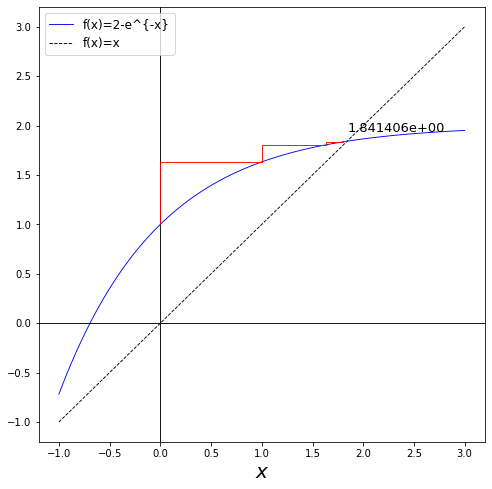

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def f0(x):
    return x

def f1(x):
    return 2 - np.exp(-x)

# Guess used for relaxation method 
guess = 0.0  

# Create x and y arrays of functions
step = 101
LB, UB = -1, 3

a_x = np.linspace(LB,UB,step)
a_y  = f1(a_x)           
a_y0 = f0(a_x)           
          
# Plot the function
plt.figure(figsize=(8,8))

plt.plot(a_x,a_y ,color = "blue", linewidth = 0.9,label='f(x)=2-e^{-x}')
plt.plot(a_x,a_y0,color = "black", linewidth = 0.9, linestyle='--',label='f(x)=x')

# Draw vertical and horizontal lines to serve as axes
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

#plt.show()

# Do the relaxation method. Keep track of the x,y value for each step and plot.
l_x = [] 
l_y = []

x = guess

it = 30
for k in range(it):
    y = f1(x)
    l_x.append(x)
    l_y.append(y)
    print(x)
    x = y

r_x = np.array(l_x,float)
r_y = np.array(l_y,float)

plt.step(r_x,r_y,color = "red", linewidth = 0.9)
plt.text(x,y+0.1,'%e'%x, fontsize=13)

plt.legend(loc='upper left', fontsize='large')

# Label the axes and increase the font
plt.xlabel("$x$"      , fontsize=20)

plt.show()

### Example 2

$x = \cos(x)$

In [4]:
# Relaxation method: x = cos(x)
import numpy as np
x = 1.0
for k in range(100):
    x = np.cos(x)
    print(x)

0.5403023058681398
0.8575532158463934
0.6542897904977791
0.7934803587425656
0.7013687736227565
0.7639596829006542
0.7221024250267079
0.7504177617637604
0.7314040424225099
0.7442373549005569
0.7356047404363473
0.7414250866101093
0.7375068905132427
0.7401473355678758
0.7383692041223231
0.7395672022122561
0.7387603198742112
0.739303892396906
0.7389377567153443
0.7391843997714937
0.7390182624274122
0.7391301765296711
0.7390547907469174
0.7391055719265363
0.7390713652989449
0.7390944073790913
0.739078885994992
0.7390893414033928
0.7390822985224023
0.7390870426953322
0.7390838469650002
0.7390859996481299
0.7390845495752126
0.7390855263619245
0.7390848683867142
0.7390853116067619
0.7390850130484203
0.739085214160917
0.739085078689123
0.7390851699445544
0.7390851084737986
0.7390851498812395
0.7390851219886894
0.7390851407774467
0.7390851281211138
0.7390851366465718
0.7390851309037207
0.7390851347721743
0.7390851321663374
0.7390851339216605
0.7390851327392538
0.7390851335357372
0.73908513299921

Let's do this again, but this time include some nice graphics to help demonstrate the method:

0.0
1.0
0.5403023058681398
0.8575532158463934
0.6542897904977791
0.7934803587425656
0.7013687736227565
0.7639596829006542
0.7221024250267079
0.7504177617637604
0.7314040424225099
0.7442373549005569
0.7356047404363473
0.7414250866101093
0.7375068905132427
0.7401473355678758
0.7383692041223231
0.7395672022122561
0.7387603198742112
0.739303892396906
0.7389377567153443
0.7391843997714937
0.7390182624274122
0.7391301765296711
0.7390547907469174
0.7391055719265363
0.7390713652989449
0.7390944073790913
0.739078885994992
0.7390893414033928


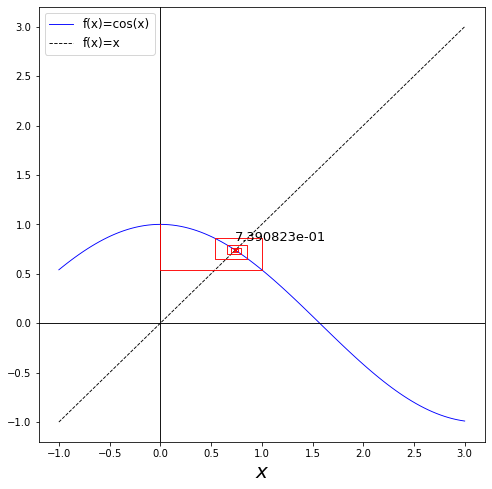

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def f0(x):
    return x

def f1(x):
    return np.cos(x)

# Guess used for relaxation method 
guess = 0.0  

# Create x and y arrays of functions
step = 101
LB, UB = -1, 3

a_x = np.linspace(LB,UB,step)
a_y  = f1(a_x)           
a_y0 = f0(a_x)           
          
# Plot the function
plt.figure(figsize=(8,8))

plt.plot(a_x,a_y ,color = "blue", linewidth = 0.9,label='f(x)=cos(x)')
plt.plot(a_x,a_y0,color = "black", linewidth = 0.9, linestyle='--',label='f(x)=x')

# Draw vertical and horizontal lines to serve as axes
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

#plt.show()

# Do the relaxation method. Keep track of the x,y value for each step and plot.
l_x = [] 
l_y = []

x = guess

it = 30
for k in range(it):
    y = f1(x)
    l_x.append(x)
    l_y.append(y)
    print(x)
    x = y

r_x = np.array(l_x,float)
r_y = np.array(l_y,float)

plt.step(r_x,r_y,color = "red", linewidth = 0.9)
plt.text(x,y+0.1,'%e'%x, fontsize=13)

plt.legend(loc='upper left', fontsize='large')

# Label the axes and increase the font
plt.xlabel("$x$"      , fontsize=20)


plt.show()

### Example 3

$x=\sin(x)$ with inital guess x = 2 

2.0
0.9092974268256817
0.7890723435728884
0.7097000402345258
0.6516062636498291
0.606464344938615
0.5699658928122394
0.5396033335454621
0.513795726952195
0.49148642206518095
0.4719368868058549
0.4546123016451699
0.43911402646395187
0.4251377119701682
0.41244623877209624
0.40085162960706694
0.3902026038089464
0.3803757974172909
0.3712694329849674
0.3627986673680121
0.35489211415615574
0.34748920443044273
0.3405381562584766
0.3339943931488303
0.3278192983231869
0.32197922341862095
0.31644469222918087
0.3111897555754928
0.30619146444261625
0.3014294365218599


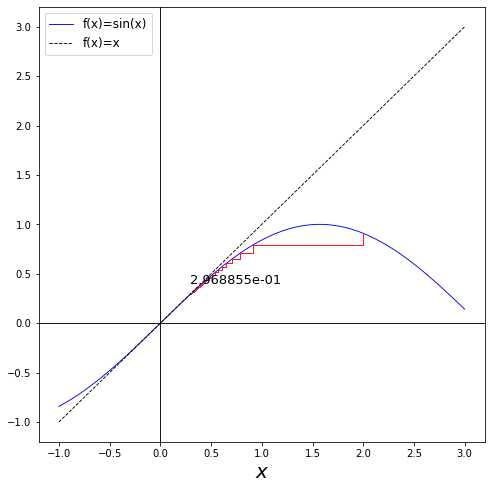

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def f0(x):
    return x

def f1(x):
    return np.sin(x)

# Guess used for relaxation method 
guess = 2.0  

# Create x and y arrays of functions
step = 101
LB, UB = -1, 3

a_x = np.linspace(LB,UB,step)
a_y  = f1(a_x)           
a_y0 = f0(a_x)           
          
# Plot the function
plt.figure(figsize=(8,8))

plt.plot(a_x,a_y ,color = "blue", linewidth = 0.9,label='f(x)=sin(x)')
plt.plot(a_x,a_y0,color = "black", linewidth = 0.9, linestyle='--',label='f(x)=x')

# Draw vertical and horizontal lines to serve as axes
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

#plt.show()

# Do the relaxation method. Keep track of the x,y value for each step and plot.
l_x = [] 
l_y = []

x = guess

it = 30
for k in range(it):
    y = f1(x)
    l_x.append(x)
    l_y.append(y)
    print(x)
    x = y

r_x = np.array(l_x,float)
r_y = np.array(l_y,float)

plt.step(r_x,r_y,color = "red", linewidth = 0.9)
plt.text(x,y+0.1,'%e'%x, fontsize=13)

plt.legend(loc='upper left', fontsize='large')

# Label the axes and increase the font
plt.xlabel("$x$"      , fontsize=20)


plt.show()

### Example 4

$x = e^{1-x^2}$

2.0
0.049787068367863944
2.7115522254147324
0.0017423587659541767
2.718273576273352
0.0016799164222487733
2.7182741571545694
0.001679911117100466
2.718274157203021
0.0016799111166579624
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221


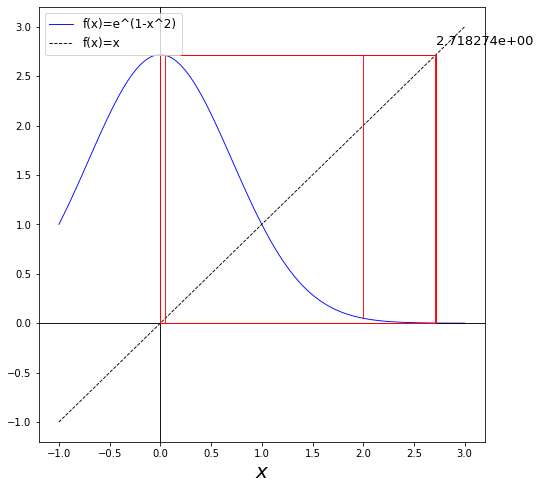

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def f0(x):
    return x

def f1(x):
    return np.exp(1-x*x)

# Guess used for relaxation method 
guess = 2.0  

# Create x and y arrays of functions
step = 101
LB, UB = -1, 3

a_x = np.linspace(LB,UB,step)
a_y  = f1(a_x)           
a_y0 = f0(a_x)           
          
# Plot the function
plt.figure(figsize=(8,8))

plt.plot(a_x,a_y ,color = "blue", linewidth = 0.9,label='f(x)=e^(1-x^2)')
plt.plot(a_x,a_y0,color = "black", linewidth = 0.9, linestyle='--',label='f(x)=x')

# Draw vertical and horizontal lines to serve as axes
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

#plt.show()

# Do the relaxation method. Keep track of the x,y value for each step and plot.
l_x = [] 
l_y = []

x = guess

it = 30
for k in range(it):
    y = f1(x)
    l_x.append(x)
    l_y.append(y)
    print(x)
    x = y

r_x = np.array(l_x,float)
r_y = np.array(l_y,float)

plt.step(r_x,r_y,color = "red", linewidth = 0.9)
plt.text(x,y+0.1,'%e'%x, fontsize=13)

plt.legend(loc='upper left', fontsize='large')

# Label the axes and increase the font
plt.xlabel("$x$"      , fontsize=20)


plt.show()

It didn't work! The method is not converging. It seems to be oscillating about two points.

Let's try inverting the equation:

$x = e^{1-x^2}$

Take the natural log of both sides:

$\ln(x) = 1- x^2$

Simplify:

$x = \sqrt{1 - \ln(x)}$


2.0
0.5539429748990907
1.26122699421159
0.8763075646981526
1.0639728137568971
0.9684989212112417
1.0158779011335735
0.9920921500118133
1.0039617935232876
0.9980210587528792
1.000989960957904
0.9995051419228869
1.0002474596617483
0.9998762778220831
1.0000618630025528
0.9999690689770778
1.0000154656310551
0.9999922672143703
1.0000038664002895
0.9999980668017239
1.0000009665996052
0.9999995167003142
1.0000002416498721
0.9999998791750713
1.0000000604124661
0.9999999697937674
1.0000000151031163
0.9999999924484418
1.000000003775779
0.9999999981121105


<ipython-input-8-bb19cdd35d3a>:9: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(1-np.log(x))
<ipython-input-8-bb19cdd35d3a>:9: RuntimeWarning: invalid value encountered in log
  return np.sqrt(1-np.log(x))
<ipython-input-8-bb19cdd35d3a>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-np.log(x))


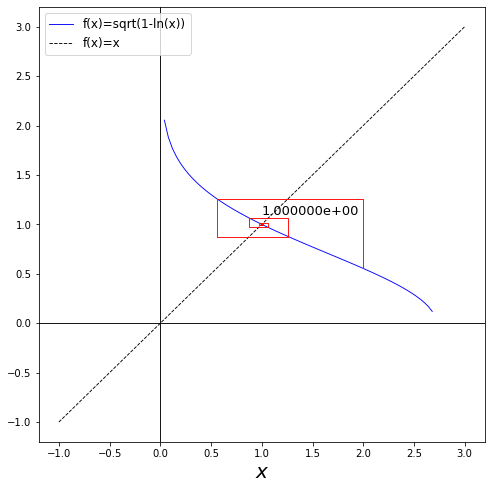

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def f0(x):
    return x

def f1(x):
    return np.sqrt(1-np.log(x))

# Guess used for relaxation method 
guess = 2.0  

# Create x and y arrays of functions
step = 101
LB, UB = -1, 3

a_x = np.linspace(LB,UB,step)
a_y  = f1(a_x)           
a_y0 = f0(a_x)           
          
# Plot the function
plt.figure(figsize=(8,8))

plt.plot(a_x,a_y ,color = "blue", linewidth = 0.9,label='f(x)=sqrt(1-ln(x))')
plt.plot(a_x,a_y0,color = "black", linewidth = 0.9, linestyle='--',label='f(x)=x')

# Draw vertical and horizontal lines to serve as axes
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

#plt.show()

# Do the relaxation method. Keep track of the x,y value for each step and plot.
l_x = [] 
l_y = []

x = guess

it = 30
for k in range(it):
    y = f1(x)
    l_x.append(x)
    l_y.append(y)
    print(x)
    x = y

r_x = np.array(l_x,float)
r_y = np.array(l_y,float)

plt.step(r_x,r_y,color = "red", linewidth = 0.9)
plt.text(x,y+0.1,'%e'%x, fontsize=13)

plt.legend(loc='upper left', fontsize='large')

# Label the axes and increase the font
plt.xlabel("$x$"      , fontsize=20)


plt.show()

This time we converged! If the relaxation method isn't converging, try inverting the equation and try the method again.

### Example 5

$x = \tanh(x/0.7)$

2.0
0.993424677228132
0.8894273415295573
0.8539630272075722
0.8396385945829505
0.8334970593889619
0.8307989635138242
0.8296011373128945
0.8290668985223211
0.8288281350201022
0.8287213284532772
0.8286735309021206
0.8286521368611123
0.8286425601679364
0.8286382731604172
0.8286363540496396
0.8286354949391254
0.8286351103478284
0.8286349381805915
0.8286348611076644
0.828634826604945
0.8286348111593426
0.8286348042449122
0.8286348011495749
0.8286347997639057
0.8286347991435924
0.8286347988659009
0.8286347987415885
0.8286347986859384
0.8286347986610259


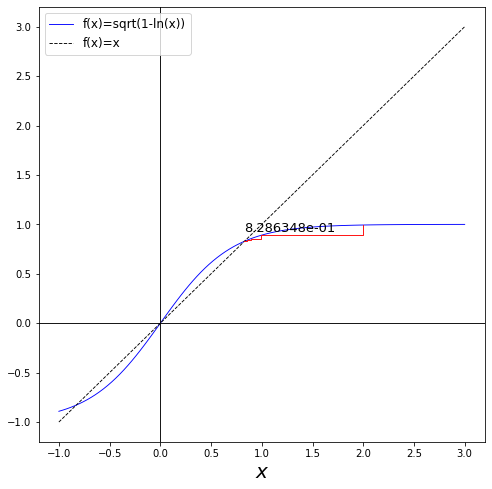

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def f0(x):
    return x

def f1(x):
    return np.tanh(x/0.7)

# Guess used for relaxation method 
guess = 2.0  

# Create x and y arrays of functions
step = 101
LB, UB = -1, 3

a_x = np.linspace(LB,UB,step)
a_y  = f1(a_x)           
a_y0 = f0(a_x)           
          
# Plot the function
plt.figure(figsize=(8,8))

plt.plot(a_x,a_y ,color = "blue", linewidth = 0.9,label='f(x)=sqrt(1-ln(x))')
plt.plot(a_x,a_y0,color = "black", linewidth = 0.9, linestyle='--',label='f(x)=x')

# Draw vertical and horizontal lines to serve as axes
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

#plt.show()

# Do the relaxation method. Keep track of the x,y value for each step and plot.
l_x = [] 
l_y = []

x = guess

it = 30
for k in range(it):
    y = f1(x)
    l_x.append(x)
    l_y.append(y)
    print(x)
    x = y

r_x = np.array(l_x,float)
r_y = np.array(l_y,float)

plt.step(r_x,r_y,color = "red", linewidth = 0.9)
plt.text(x,y+0.1,'%e'%x, fontsize=13)

plt.legend(loc='upper left', fontsize='large')

# Label the axes and increase the font
plt.xlabel("$x$"      , fontsize=20)


plt.show()

Important note: We only found one out of the three solutions! If we tried a few different guesses we could probably find them all.

### Example 6

Example 6.3 from Newman

The magnetization of a ferromagnetic material depends on temperature based on the formula:

$M = \mu \tanh \frac{J M}{k_B T}$

where $\mu$ is the magnetic moment, $J$ is a coupling constant, and $k_b$ is Boltzman's constant. Lets simplify this a bit by defining $m=M/\mu$ and $C=\mu J/k_b$:

$m = \tanh \frac{Cm}{T}$

This formula is derived using a concept known as mean field theory and it depends on the spin interactions between atoms (beyond the scope of this course).

For a given value of T, what is the value of m that satisfies this equation?

Vary T, then for each value of T solve for m using the relaxation method:

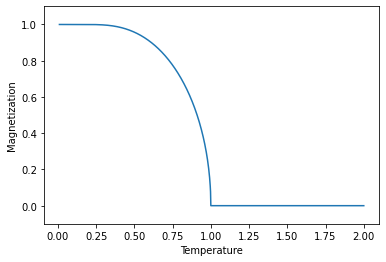

In [10]:
# Example 6.3 from Newman

from math import tanh,cosh
from numpy import linspace
from pylab import plot,show,ylim,xlabel,ylabel

# Constants
Tmin = 0.01
Tmax = 2.0
points = 1000
accuracy = 1e-6

# Set up lists for plotting
y = []

# Create an array of temperatues between Tmin and Tmax
temp = linspace(Tmin,Tmax,points)

# Temperature loop
for T in temp:
    m1 = 1.0
    error = 1.0

    # Loop until error is small enough
    while error>accuracy:
        m1,m2 = tanh(m1/T),m1
        error = abs((m1-m2)/(1-T*cosh(m1/T)**2))
    y.append(m1)

# Make the graph
plot(temp,y)
ylim(-0.1,1.1)
xlabel("Temperature")
ylabel("Magnetization")
show()


We can see that the magnetization decreases with temperature (heat causes the atoms to move more which disrupts the bulk alignment). A phase transition occurs at T=1 (the "critical temperature" or "curie temperature") where the magnetization disapears completely and suddenly (not gradually as one may expect). In the presence of magnetic field as you cool down a ferromagnet "spontaneous symmetry breaking" occurs, leading to aligned magnetic moments.

## Bisection method

Tool for finding roots and solving non-linear equations. 

This method is also known as a "binary search" or by the term "interval halving".

Find the root of the equation:

$e^{-z}-0.4=0$

0.916748046875


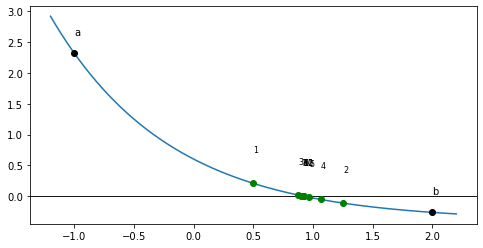

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def f(z):
    return np.exp(-z) - 0.4

#def f(z):
    #return z*z*z-z - 0.2

#def f1(z):
#    return 2 - np.exp(-z)

tol = 0.001
a,b = -1,2
x = np.linspace(a-0.2,b+0.2,1000)

plt.figure(figsize=(8,4))
plt.axhline(0,linewidth=0.9, color='black')

plt.plot(x,f(x),lw=1.5)


fa,fb = f(a), f(b)

plt.plot(a,fa,'ko')
plt.plot(b,fb,'ko')
plt.text(a,fa+0.3,'a')
plt.text(b,fb+0.3,'b')

n=1
m_final  = 0.0
fm_final = 0.0
while b-a > tol:
    m = a+(b-a)/2
    fm = f(m)
    m_final = m 
    fm_final = fm 
    
    plt.plot(m,fm,'go')
    plt.text(m,fm+0.5,'%d'%n, fontsize=8)

    n+=1
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb =m, fm


print(m_final)
#plt.text(m_final,fm_final-0.4)#%,'%e'%x, fontsize=13)


plt.show()

## Newton-Raphson method

Again we turn the problem of solving an equation into finding the root of a function.

Newton's method starts with a guess for the location of the root. You then find the slope at that position. We use that slope to estimate our next guess. We continue to do this until f(x1) = f(x2) within some tolerance.

#### Example:

We want to calculate $\sqrt{39}$. Lets turn this into an equaiton which we can find the root of:

$x = \sqrt{39}$

$x^2 = 39$

$x^2 - 39 = 0$



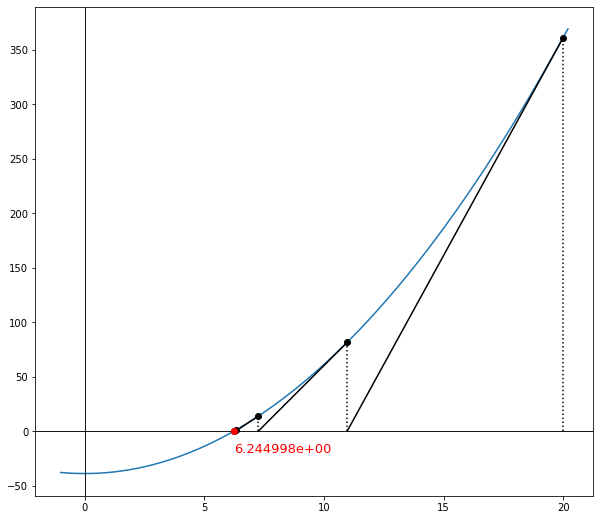

In [16]:
# Newton's method for finding roots using SymPy
import sympy as sy
sy.init_printing()

initial_guess =  20              
xmin          = -1                 
xmax          =  20.1                 
tol = 0.001 # Tolerance.

# Define our variable and function using sympy
s_x = sy.symbols("x")

# function 1 (Goal: find the root of e^x-2)
#s_f = sy.exp(s_x)-2

# function 2 (Goal: find the square root of 39)
s_f = s_x**2-39

# Evaluate the derivative of the function 
s_fprime = sy.diff(s_f,s_x)

# Evaluate the function over an array of x values
x = np.linspace(xmin,xmax+0.1,1000)
f  = lambda x: sy.lambdify(s_x,s_f,"numpy")(x)

# Evaluate also the derivative of the function
fp = lambda x: sy.lambdify(s_x,s_fprime,"numpy")(x)

# Plot the function
plt.figure(figsize=(10,9))
plt.plot(x,f(x))
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

# Perform Newton's method
n = 0
xi = initial_guess # The first x value we will try is the initial guess

while f(xi)>tol:
    # Newton's method formula:
    #  the new guess is based on where the line defined by the derivative of the function 
    #  (evaluated at the previous point) crosses the x-axis
    xi_new = xi - f(xi)/fp(xi) 
    
    # Draw the method
    plt.plot([xi,xi],[0,f(xi)],color='k',ls=':') # Draw a dashed line indicated the location of each point
    plt.plot(xi,f(xi),'ko')     # Draw a dot indicating the function evaluated at each point
    plt.plot([xi,xi_new],[f(xi),0],'k-') # Draw a slope line
    
    # Set the point for the next iteration 
    xi = xi_new
    n +=1

# Draw the final guess
plt.plot(xi,f(xi),'ro')
plt.text(xi,f(xi)-20,'%e'%xi, fontsize=13, color='r')

# Show the plot
plt.show()

This matches the correct answer (6.2449979984) within some tolerance.

From the graph above we can better understand the method:

If our original guess is $x$, take the derivative and evaluate it at $x$. Our new guess is the location where the line defined by the derivative crosses the x-axis.

$f'(x) = \frac{\Delta y}{\Delta x} = \frac{f(x)-0}{\Delta x} = \frac{f(x)}{\Delta x}$

Therefore we can solve for $\Delta x$:

$\Delta x = \frac{f(x)}{f'(x)}$

New guess $x'$:

$x' = x - \Delta x = x - \frac{f(x)}{f'(x)}$

Newton's method can fail if you take an unlucky guess. For example, for the following function with a bad guess the method moves us away from the root:

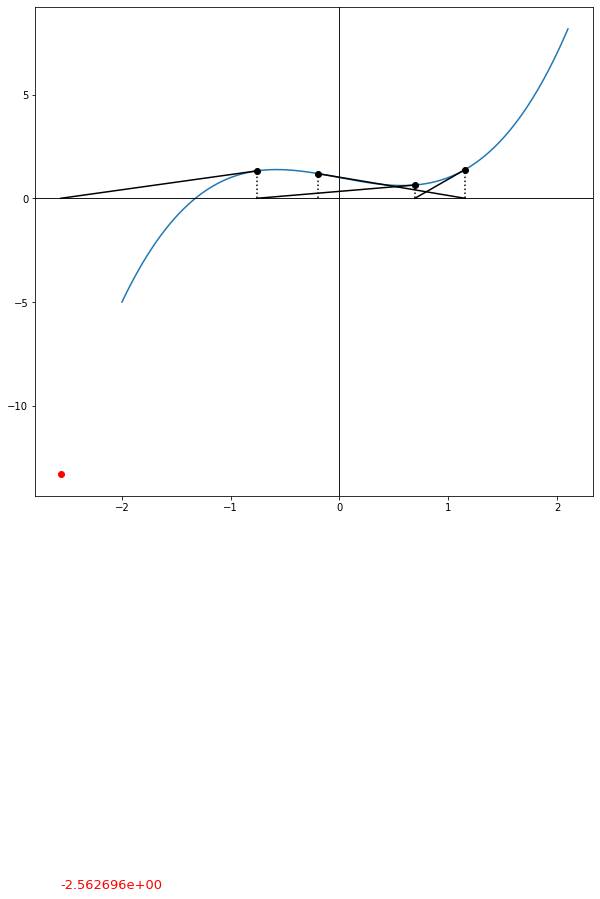

In [17]:
# Newton's method for finding roots using SymPy
import sympy as sy
sy.init_printing()

initial_guess =  -0.2              
xmin          = -2                 
xmax          =  2                 
tol = 0.001 # Tolerance.

# Define our variable and function using sympy
s_x = sy.symbols("x")

# function 
s_f = s_x**3-s_x+1

# Evaluate the derivative of the function 
s_fprime = sy.diff(s_f,s_x)

# Evaluate the function over an array of x values
x = np.linspace(xmin,xmax+0.1,1000)
f  = lambda x: sy.lambdify(s_x,s_f,"numpy")(x)

# Evaluate also the derivative of the function
fp = lambda x: sy.lambdify(s_x,s_fprime,"numpy")(x)

# Plot the function
plt.figure(figsize=(10,9))
plt.plot(x,f(x))
plt.axvline(0,linewidth=0.9, color='black')
plt.axhline(0,linewidth=0.9, color='black')

# Perform Newton's method
n = 0
xi = initial_guess # The first x value we will try is the initial guess

while f(xi)>tol:
    # Newton's method formula:
    #  the new guess is based on where the line defined by the derivative of the function 
    #  (evaluated at the previous point) crosses the x-axis
    xi_new = xi - f(xi)/fp(xi) 
    
    # Draw the method
    plt.plot([xi,xi],[0,f(xi)],color='k',ls=':') # Draw a dashed line indicated the location of each point
    plt.plot(xi,f(xi),'ko')     # Draw a dot indicating the function evaluated at each point
    plt.plot([xi,xi_new],[f(xi),0],'k-') # Draw a slope line
    
    # Set the point for the next iteration 
    xi = xi_new
    n +=1

# Draw the final guess
plt.plot(xi,f(xi),'ro')
plt.text(xi,f(xi)-20,'%e'%xi, fontsize=13, color='r')

# Show the plot
plt.show()

## Exercise

Newman Exercise 6.12

The biochemical process of glycolysis (the breakdown of glucose in the body to release energy) can be modeled by the equations:

$\frac{dx}{dt}=-x +ay+x^2y$

$\frac{dy}{dt}=b-ay-x^2 y$

Here x and y represent the concentrations of ADP and F6P, and a and b are positive constants.

We wish to find the "stationary points" of these equations, meaning the values of x and y at which the derivatives of both variables become zero simultaneously, so that x and y both become consant in time:

$0=-x +ay+x^2y$

$0=b-ay-x^2 y$

We can rearrange these to read:

$x=\sqrt{\frac{b-ay}{y}}$

$y=\frac{x}{a+x^2}$


Write a program which uses the relaxation method to solve these simultaneously to find the stationary point for x and y with a=1 and b=2. 